# Covid19 - Folge 22 und 23

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [48]:
df = pd.read_csv('data/covid22-23.csv')
df.head(3)
# keys = ['Datum', 'Bundesland', 'Betten', 'Bettenart']
# for k in keys:
#     print(df[k].unique())

,Datum,Bundesland,Betten,Bettenart
0,2022-02-01,Baden-Württemberg,278,Intensivbett
1,2022-02-01,Baden-Württemberg,1140,Normalbett
2,2022-02-01,Bayern,346,Intensivbett


In [ ]:
sns.lineplot(data=df[df['Bundesland']=='Bayern'], x='datum', y='Betten')
plt.show()

KeyError: 'Bundesland'

In [50]:
# Template für Dash page
# Projekt Health Care Analysis
# AUTHOR Sven Schrodt
# SINCE 2025-07-15

import dash_mantine_components as dmc
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dd import DataDictionary as dd
from helper import Sanitizer

df = pd.read_csv('data/covid22-23.csv')

fig = px.line(df, x="Datum", y="Betten", color="Bundesland")
app = Dash()

app.layout = [
    html.H1(children="Grunddaten der Krankenhäuser", className="app-header",),
    html.Hr(),
    dash_table.DataTable(
        data=df.to_dict("records"),
        columns=[{"name": i, "id": i} for i in df.columns],
        page_size=3,
        style_header={"backgroundColor": "rgb(30, 30, 30)", "color": "white"},
        style_data={"backgroundColor": "rgb(50, 50, 50)", "color": "white"},
    ),
    #dcc.Checklist(options=dta, id='controls-and-check-item', value=['bett'], inline=True),
    dcc.Graph(figure=fig, id="controls-and-graph"),
    
]

@callback(
    Output(component_id="controls-and-graph", component_property="figure"),
    Input(component_id="controls-and-check-item", component_property="value"),
)
   


def update_graph(col_chosen):
    print(col_chosen)
    #foo = df[col_chosen]
    fig = px.line(df, x="jahr", y=col_chosen)
    return fig


if __name__ == "__main__":
    app.run(debug=False, port=4711)

# CSV Analyse von 
- https://opendata.rvr.ruhr/dataset/stand-der-infektionsfalle-mit-coronavirus-covid-19-im-kreis-wesel


# Foo

In [ ]:
from helper import Sanitizer

df = pd.read_csv('data/cv19/mo_san_sh.csv', parse_dates=True)

df.head(12)


,datum,infekt_sum,infekt_ink,genesen,verstorben,holy_inzidenz,dt_iso
0,26.08.2022,34.274,0.000,32.963,121,"0,00",2022-08-26
1,19.08.2022,34.274,414.000,32.963,121,"399,05",2022-08-19
2,12.08.2022,33.860,452.000,32.481,121,"435,68",2022-08-12
3,05.08.2022,33.408,1.046,31.927,120,"1.008,23",2022-08-05
4,22.07.2022,32.362,621.000,30.603,120,"598,58",2022-07-22
5,15.07.2022,31.741,783.000,29.793,120,"754,73",2022-07-15
6,08.07.2022,30.958,727.000,28.991,120,"700,75",2022-07-08
7,01.07.2022,30.231,1.585,28.254,120,"1.527,77",2022-07-01
8,17.06.2022,28.646,537.000,27.714,119,"517,61",2022-06-17
9,10.06.2022,28.109,381.000,27.373,119,"367,24",2022-06-10


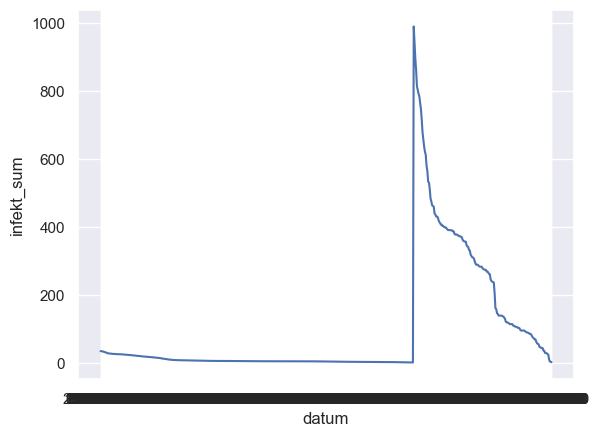

In [ ]:
sns.lineplot(data=df, x='dt_iso', y='infekt_sum')

#'genesen'

plt.show()